In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})
!pip install surprise
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split, cross_validate
from ast import literal_eval

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [5]:
rating=pd.read_csv("Movie recommendation/ratings.csv")
rating.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [9]:
df_moviesmetadata=pd.read_csv( 'Movie recommendation/movies_metadata.csv', low_memory=False) 
print(df_moviesmetadata.shape)
print(df_moviesmetadata.columns)
df_moviesmetadata.head(5)

(42640, 24)
Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [11]:
rating.info

<bound method DataFrame.info of          userId  movieId  rating   timestamp
0             1      110     1.0  1425941529
1             1      147     4.5  1425942435
2             1      858     5.0  1425941523
3             1     1221     5.0  1425941546
4             1     1246     5.0  1425941556
...         ...      ...     ...         ...
2753088   28519     6377     3.5  1162995977
2753089   28519     6378     4.0  1192195677
2753090   28519     6383     3.0  1148044956
2753091   28519     6424     2.0  1147888797
2753092   28519     6534     2.5     1194010

[2753093 rows x 4 columns]>

In [13]:
rating.describe()

,userId,movieId,rating,timestamp
count,2.753093e+06,2.753093e+06,2.753093e+06,2.753093e+06
mean,1.424084e+04,1.573155e+04,3.530767e+00,1.170114e+09
std,8.269945e+03,3.084503e+04,1.053751e+00,2.047646e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,1.194010e+06
25%,7.004000e+03,1.073000e+03,3.000000e+00,9.889329e+08
50%,1.417100e+04,2.597000e+03,3.500000e+00,1.150254e+09
75%,2.148400e+04,6.440000e+03,4.000000e+00,1.354572e+09
max,2.851900e+04,1.762710e+05,5.000000e+00,1.501822e+09


In [15]:
df_moviesmetadata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42640 entries, 0 to 42639
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  42640 non-null  object 
 1   belongs_to_collection  4264 non-null   object 
 2   budget                 42640 non-null  object 
 3   genres                 42640 non-null  object 
 4   homepage               7331 non-null   object 
 5   id                     42640 non-null  object 
 6   imdb_id                42624 non-null  object 
 7   original_language      42633 non-null  object 
 8   original_title         42640 non-null  object 
 9   overview               41812 non-null  object 
 10  popularity             42635 non-null  object 
 11  poster_path            42307 non-null  object 
 12  production_companies   42637 non-null  object 
 13  production_countries   42637 non-null  object 
 14  release_date           42570 non-null  object 
 15  re

In [17]:
df_moviesmetadata.describe()

,revenue,runtime,vote_average,vote_count
count,4.263400e+04,42423.000000,42633.000000,42633.000000
mean,1.177045e+07,94.933998,5.639244,115.464452
std,6.568300e+07,37.481925,1.897813,505.369766
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,86.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,37.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [19]:
df_ratings=pd.read_csv( 'Movie recommendation/ratings_small.csv', low_memory=False) 

print(df_ratings.shape)
print(df_ratings.columns)
df_ratings.head(3)

(100004, 4)
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


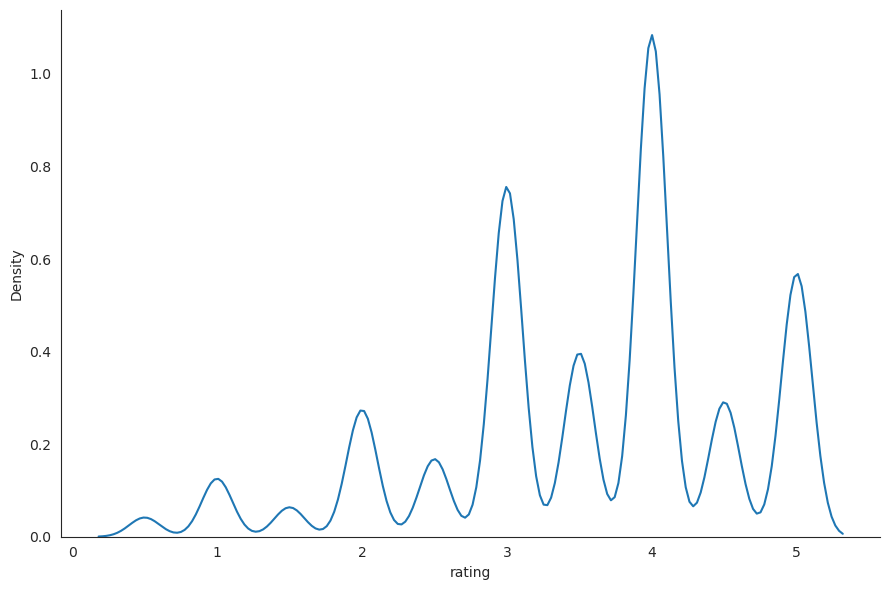

In [21]:
sns.displot(data=df_ratings, x='rating', kind='kde', aspect=1.5, height=6)

In [23]:
df_mmeta = df_moviesmetadata.drop([19730, 29503, 35587])

df_movies = pd.DataFrame()

# we only consider movies with at least 10 ratings
df_movies = df_mmeta[(df_mmeta['vote_count'] >= 10) & (df_mmeta['vote_average'].notnull())][['title','vote_count','vote_average']]

# extract the release year 
df_movies['year'] = pd.to_datetime(df_mmeta['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

# extract genres
df_movies['genres'] = df_mmeta['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

# change the index to movie_id
df_movies['movieId'] = pd.to_numeric(df_mmeta['id'])
df_movies = df_movies.set_index('movieId')

# add vote count
df_movies['vote_count'] = df_movies['vote_count'].astype('int')
df_movies

,title,vote_count,vote_average,year,genres
movieId,,,,,
862,Toy Story,5415,7.7,1995,"[Animation, Comedy, Family]"
8844,Jumanji,2413,6.9,1995,"[Adventure, Fantasy, Family]"
15602,Grumpier Old Men,92,6.5,1995,"[Romance, Comedy]"
31357,Waiting to Exhale,34,6.1,1995,"[Comedy, Drama, Romance]"
11862,Father of the Bride Part II,173,5.7,1995,[Comedy]
...,...,...,...,...,...
190824,Hôtel Normandy,14,4.9,2013,[Comedy]
40249,They Nest,15,4.7,2000,"[Science Fiction, Horror]"
438597,Major Grom,14,6.6,2017,"[Action, Adventure, Science Fiction, Drama]"


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


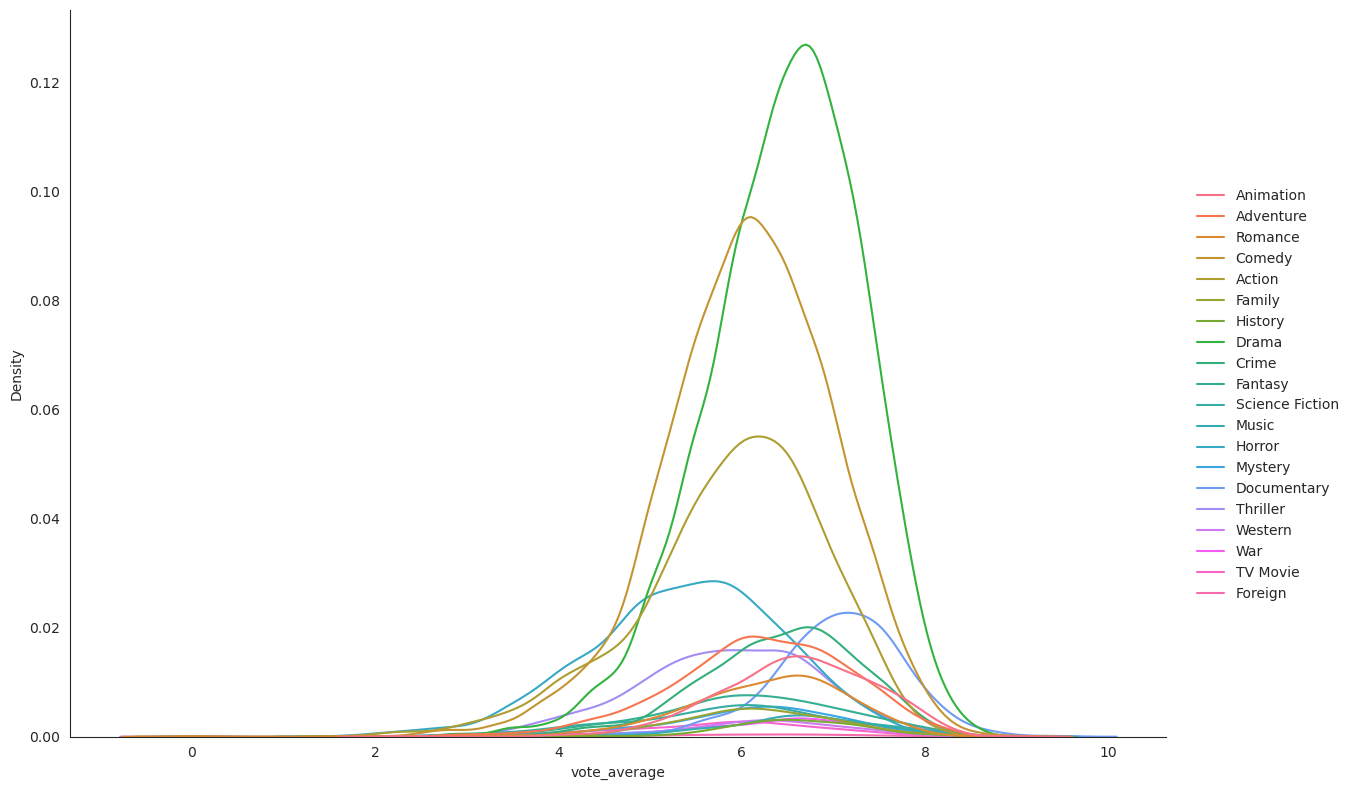

In [25]:
split_df = pd.DataFrame(df_movies['genres'].tolist())
df_merged = pd.concat([split_df.set_index(df_movies.index), df_movies], axis=1)
sns.displot(data=df_merged, x='vote_average', kind='kde', hue=0, aspect=1.5, height=8)

In [27]:
df_ratings_temp = df_ratings.dropna()

# Convert datetime
df_ratings_temp['timestamp'] =  pd. to_datetime(df_ratings_temp['timestamp'], unit='s')

print(f'unique users: {len(df_ratings_temp.userId.unique())}, ratings: {len(df_ratings_temp)}')
df_ratings_temp.head()

unique users: 671, ratings: 100004


,userId,movieId,rating,timestamp
0,1,31,2.5,2009-12-14 02:52:24
1,1,1029,3.0,2009-12-14 02:52:59
2,1,1061,3.0,2009-12-14 02:53:02
3,1,1129,2.0,2009-12-14 02:53:05
4,1,1172,4.0,2009-12-14 02:53:25


In [29]:
reader = Reader()
ratings_by_users = Dataset.load_from_df(df_ratings_temp[['userId', 'movieId', 'rating']], reader)

# Split the Data into train and test
train_df, test_df = train_test_split(ratings_by_users, test_size=.2)

In [31]:
svd_model = SVD()
svd_model_trained = svd_model.fit(train_df)

<Axes: ylabel='Mean Absolute Error'>

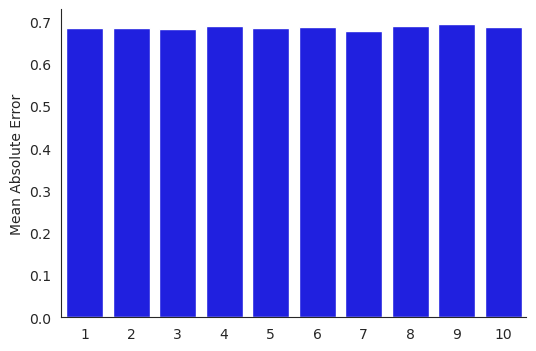

In [33]:
cross_val_results = cross_validate(svd_model_trained, ratings_by_users, measures=['RMSE', 'MAE', 'MSE'], cv=10, verbose=False)
test_mae = cross_val_results['test_mae']

# mean squared errors per fold
df_test_mae = pd.DataFrame(test_mae, columns=['Mean Absolute Error'])
df_test_mae.index = np.arange(1, len(df_test_mae) + 1)
df_test_mae.sort_values(by='Mean Absolute Error', ascending=False).head(15)

# plot an overview of the performance per fold
plt.figure(figsize=(6,4))
sns.barplot(y='Mean Absolute Error', x=df_test_mae.index, data=df_test_mae, color="b")

In [35]:
user_id = 217 # some test user from the ratings file
movie_id = 4002
rating_real = df_ratings.query(f'movieId == {movie_id} & userId == {user_id}')['rating'].values[0]
movie_title = df_movies[df_movies.index == 862]['title'].values[0]

print(f'Movie title: {movie_title}')
print(f'Actual rating: {rating_real}')

# predict and show the result
rating_pred = svd_model_trained.predict(user_id, movie_id, rating_real, verbose=True)

Movie title: Toy Story
Actual rating: 4.5
user: 217        item: 4002       r_ui = 4.50   est = 4.27   {'was_impossible': False}


In [37]:
user_id = 400 # some test user from the ratings file

# create the predictions
pred_series= []
df_ratings_filtered = df_ratings[df_ratings['userId'] == user_id]

print(f'number of ratings: {df_ratings_filtered.shape[0]}')
for movie_id, name in zip(df_movies.index, df_movies['title']):
    # check if the user has already rated a specific movie from the list
    rating_real = df_ratings.query(f'movieId == {movie_id}')['rating'].values[0] if movie_id in df_ratings_filtered['movieId'].values else 0
    # generate the prediction
    rating_pred = svd_model_trained.predict(user_id, movie_id, rating_real, verbose=False)
    # add the prediction to the list of predictions
    pred_series.append([movie_id, name, rating_pred.est, rating_real])

# print the results
df_recommendations = pd.DataFrame(pred_series, columns=['movieId', 'title', 'predicted_rating', 'actual_rating'])
df_recommendations.sort_values(by='predicted_rating', ascending=False).head(15)

number of ratings: 58


,movieId,title,predicted_rating,actual_rating
442,858,Sleepless in Seattle,4.679002,0.0
3194,318,The Million Dollar Hotel,4.548218,5.0
236,527,Once Were Warriors,4.529898,4.0
16409,4226,Shriek If You Know What I Did Last Friday the ...,4.488282,0.0
2098,912,The Thomas Crown Affair,4.482387,0.0
6532,905,Pandora's Box,4.436120,0.0
710,260,The 39 Steps,4.419437,0.0
5400,899,Broken Blossoms,4.411939,0.0
2097,913,The Thomas Crown Affair,4.392464,0.0
5558,2289,Cold Mountain,4.389629,0.0
